In [154]:
# Dependencies
import numpy as np
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [155]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [156]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [157]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#? June Query

june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6)  


In [158]:
#  3. Convert the June temperatures to a list.
june_results = []
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()
print(len(june_results))

1700


In [159]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])

# Sort the dataframe by date
june_df.set_index(june_df['date'], inplace=True)

# sort DF by date
june_df = june_df.sort_index()

# Print out sorted list without the index
print(june_df.to_string(index=False))
june_df


      date  June Temps
2010-06-01        78.0
2010-06-01        73.0
2010-06-01        77.0
2010-06-01        69.0
2010-06-01        76.0
2010-06-01        71.0
2010-06-01        74.0
2010-06-01        70.0
2010-06-01        74.0
2010-06-02        78.0
2010-06-02        70.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        71.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        72.0
2010-06-02        76.0
2010-06-03        74.0
2010-06-03        78.0
2010-06-03        73.0
2010-06-03        72.0
2010-06-03        77.0
2010-06-03        76.0
2010-06-03        75.0
2010-06-03        78.0
2010-06-03        67.0
2010-06-04        73.0
2010-06-04        75.0
2010-06-04        75.0
2010-06-04        76.0
2010-06-04        73.0
2010-06-04        68.0
2010-06-04        72.0
2010-06-04        70.0
2010-06-04        74.0
2010-06-05        73.0
2010-06-05        77.0
2010-06-05        78.0
2010-06-05        76.0
2010-06-05        72.0
2010-06-05        79.0
2010-06-05 

,date,June Temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


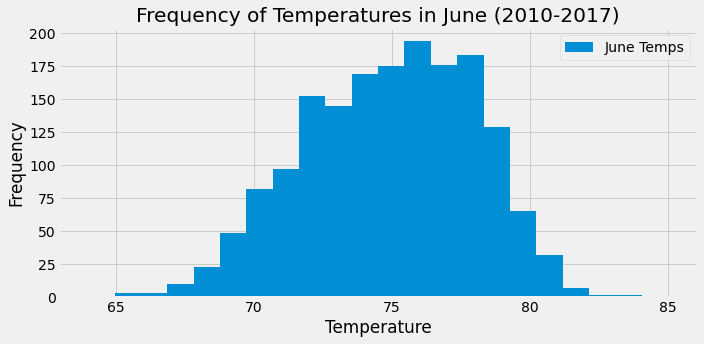

In [196]:
june_df.plot.hist(bins=22, title="Frequency of Temperatures in June (2010-2017)", figsize=(10,5))
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig("june_temp_frequency.png")
plt.show()

In [160]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [161]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
#? December Query
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12)  

In [162]:
# 7. Convert the December temperatures to a list.
december_results = []
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==12).all()

In [163]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['date', 'December Temps'])

# Sort the dataframe by date
december_df.set_index(december_df['date'], inplace=True)

# sort DF by date
december_df = december_df.sort_index()

# Print out sorted list without the index
print(december_df.to_string(index=False))
december_df


      date  December Temps
2010-12-01            76.0
2010-12-01            73.0
2010-12-01            72.0
2010-12-01            78.0
2010-12-01            72.0
2010-12-01            70.0
2010-12-01            71.0
2010-12-01            73.0
2010-12-02            71.0
2010-12-02            71.0
2010-12-02            73.0
2010-12-02            75.0
2010-12-02            74.0
2010-12-02            72.0
2010-12-02            74.0
2010-12-02            70.0
2010-12-03            67.0
2010-12-03            74.0
2010-12-03            70.0
2010-12-03            74.0
2010-12-03            71.0
2010-12-03            74.0
2010-12-03            72.0
2010-12-03            73.0
2010-12-04            75.0
2010-12-04            72.0
2010-12-04            77.0
2010-12-04            74.0
2010-12-04            74.0
2010-12-04            78.0
2010-12-04            74.0
2010-12-05            66.0
2010-12-05            69.0
2010-12-05            71.0
2010-12-05            78.0
2010-12-05            73.0
2

,date,December Temps
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


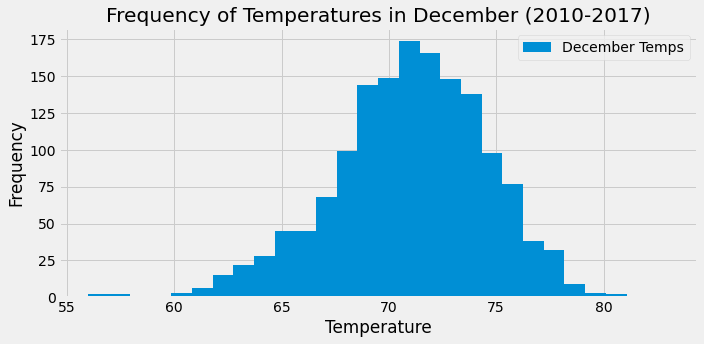

In [197]:
december_df.plot.hist(bins=28, title="Frequency of Temperatures in December (2010-2017)", figsize=(10,5))
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig("december_temp_frequency.png")
plt.show()

In [164]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional Queries

## Query 1

In [165]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
#? December Query
december_rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 12)

# 7. Convert the December temperatures to a list.
december_rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 12).all()
    
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_rain_df = pd.DataFrame(december_rain_results, columns=['date', 'December Rain'])

# Sort the dataframe by date
december_rain_df.set_index(december_rain_df['date'], inplace=True)

# sort DF by date
december_rain_df = december_rain_df.sort_index()

# Print out sorted list without the index
print(december_rain_df.to_string(index=False))
december_rain_df


      date  December Rain
2010-12-01           0.04
2010-12-01           0.03
2010-12-01           0.70
2010-12-01           0.03
2010-12-01           1.35
2010-12-01           0.13
2010-12-01           1.48
2010-12-01           0.76
2010-12-02            NaN
2010-12-02           0.16
2010-12-02           0.06
2010-12-02           0.26
2010-12-02           0.00
2010-12-02           0.13
2010-12-02           0.02
2010-12-02           0.18
2010-12-03           1.59
2010-12-03           0.01
2010-12-03           0.78
2010-12-03           0.00
2010-12-03           0.22
2010-12-03           0.01
2010-12-03           0.47
2010-12-03           0.16
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.19
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05            NaN
2010-12-05  

,date,December Rain
date,,
2010-12-01,2010-12-01,0.04
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,0.70
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,1.35
...,...,...
2016-12-31,2016-12-31,0.25
2016-12-31,2016-12-31,0.36
2016-12-31,2016-12-31,0.01


<AxesSubplot:xlabel='date'>

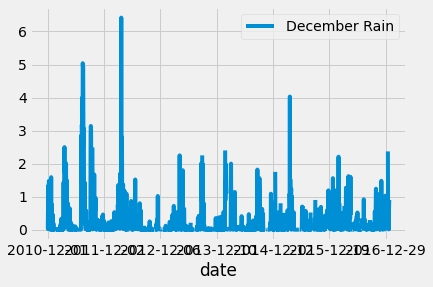

In [166]:
december_rain_df.plot()

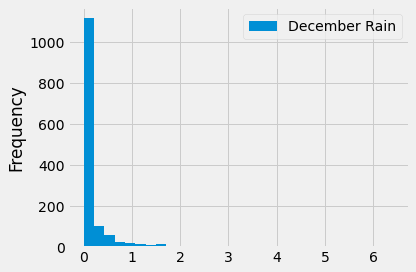

In [175]:
 #! This is not all that useful because most days have very little rain 
december_rain_df.plot.hist(bins=30)
plt.tight_layout()

In [167]:
december_rain_df.describe()

,December Rain
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## Query 2

In [168]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
#? June Query
june_rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 6)

# 7. Convert the June temperatures to a list.
june_rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date) ==6).all()
    
# 8. Create a DataFrame from the list of temperatures for the month of June. 
june_rain_df = pd.DataFrame(june_rain_results, columns=['date', 'June Rain'])

# Sort the dataframe by date
june_rain_df.set_index(june_rain_df['date'], inplace=True)

# sort DF by date
june_rain_df = june_rain_df.sort_index()

# Print out sorted list without the index
print(june_rain_df.to_string(index=False))
june_rain_df


      date  June Rain
2010-06-01       0.00
2010-06-01       0.01
2010-06-01       0.00
2010-06-01        NaN
2010-06-01       0.03
2010-06-01       0.00
2010-06-01       0.00
2010-06-01       0.08
2010-06-01       0.03
2010-06-02       0.00
2010-06-02       0.03
2010-06-02       0.00
2010-06-02       0.00
2010-06-02       0.03
2010-06-02       0.00
2010-06-02       0.00
2010-06-02       0.00
2010-06-02       0.01
2010-06-03       0.00
2010-06-03       0.00
2010-06-03       0.10
2010-06-03       0.00
2010-06-03       0.14
2010-06-03       0.00
2010-06-03       0.00
2010-06-03       0.00
2010-06-03       0.00
2010-06-04       0.00
2010-06-04       0.00
2010-06-04       0.00
2010-06-04       0.00
2010-06-04       0.00
2010-06-04       0.01
2010-06-04       0.00
2010-06-04       0.00
2010-06-04       0.00
2010-06-05       0.00
2010-06-05       0.00
2010-06-05       0.00
2010-06-05       0.00
2010-06-05       0.00
2010-06-05       0.09
2010-06-05       0.00
2010-06-05       0.00
2010-06-06

,date,June Rain
date,,
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,0.01
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,NaN
2010-06-01,2010-06-01,0.03
...,...,...
2017-06-30,2017-06-30,0.01
2017-06-30,2017-06-30,0.08
2017-06-30,2017-06-30,0.07


<AxesSubplot:xlabel='date'>

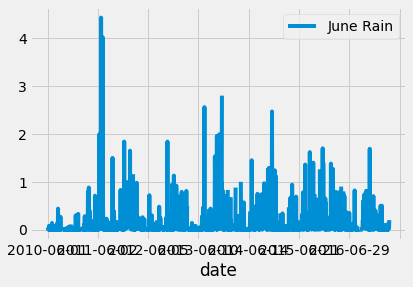

In [169]:
june_rain_df.plot()

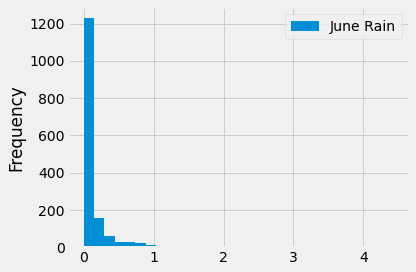

In [176]:
# Plot the results as a histogram #! This is not all that useful because most days have very little rain 
june_rain_df.plot.hist(bins=30)
plt.tight_layout()

In [144]:
june_rain_df.describe()

,June Rain
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000
